In [1]:
import numpy as np
import pandas as pd

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

In [28]:
pip install np_utils

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from keras.models import Sequential
from tensorflow.keras.optimizers import RMSprop
from keras import utils
from keras.utils import to_categorical
# from keras.utils.np_utils import to_categorical
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D

In [3]:
train_df = pd.read_csv("train.csv")
train_df

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
train_df.shape

(42000, 785)

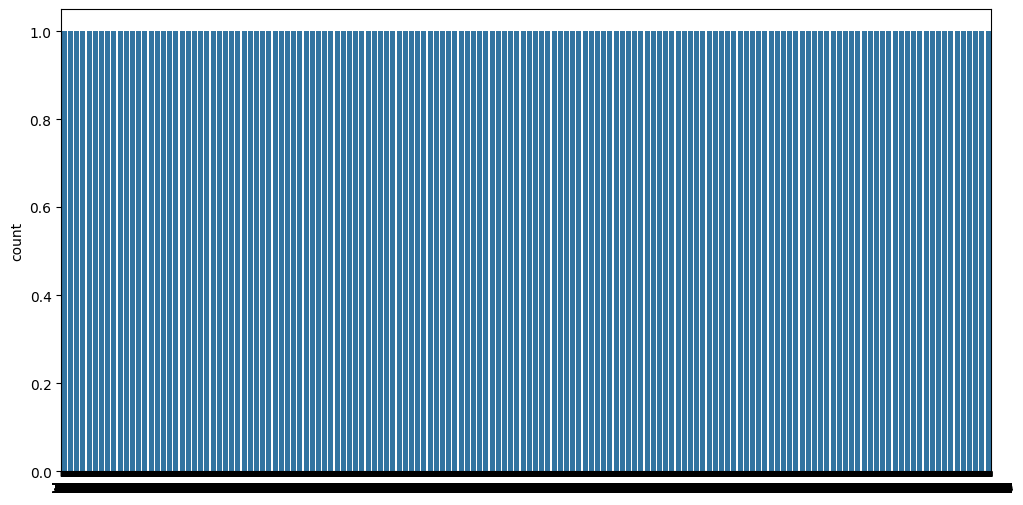

In [5]:
plt.figure(figsize=(12, 6))
sns.countplot(train_df['label'])

plt.show()

In [6]:
x_train = train_df.drop(labels = ['label'], axis = 1)
y_train = train_df['label']

## **Data Preprocessing**

In [7]:
x_train = x_train.values.reshape(-1, 28, 28, 1)
x_train = x_train / 255.0

In [8]:
y_train = to_categorical(y_train, num_classes = 10)


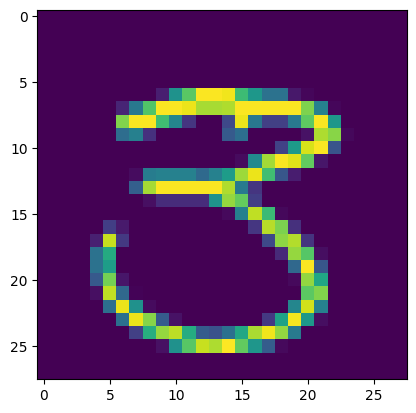

In [10]:
plt.imshow(x_train[7][:,:,0])
plt.show()

In [11]:
y_train[7]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

## **Model Building**

In [12]:
model = Sequential()
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',
                 activation ='relu', input_shape = (28,28,1)))

model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',
                 activation ='relu'))

model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Dropout(0.5))

model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same',
                 activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation = "softmax"))

optimizer = RMSprop(lr=0.001)

## **Compiling the Model**

In [13]:
model.compile(optimizer = 'adam' , loss = "categorical_crossentropy", metrics=["accuracy"])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        832       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        25632     
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 14, 14, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 64)          0         
 g2D)                                                   

In [ ]:
epochs = 20
batch_size = 64
model.fit(x_train, y_train, batch_size = batch_size, epochs = epochs)

Epoch 1/20
657/657 [==============================] - 240s 362ms/step - loss: 0.3053 - accuracy: 0.9014
Epoch 2/20
657/657 [==============================] - 232s 353ms/step - loss: 0.1062 - accuracy: 0.9674
Epoch 3/20
657/657 [==============================] - 233s 354ms/step - loss: 0.0832 - accuracy: 0.9742
Epoch 4/20
612/657 [==========================>...] - ETA: 15s - loss: 0.0687 - accuracy: 0.9789